# 🧪 Day 7 - Customer Segmentation with K-Means Clustering

Today’s project focuses on **unsupervised learning** using **K-Means Clustering** to group customers based on their annual income and spending score.

In [5]:
# Import Libraries
import requests
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [8]:
# Check if the dataset already exists locally; if not, download it

filename = "mall_customers.csv"
url = "https://raw.githubusercontent.com/gakudo-ai/open-datasets/main/Mall_Customers.csv"

# Download only if file doesn't exist
if not os.path.exists(filename):
    print("Downloading dataset...")
    response = requests.get(url)
    with open(filename, "wb") as file:
        file.write(response.content)
    print("Download complete.")
else:
    print("Dataset already exists locally.")

# Load the dataset into a pandas DataFrame
df = pd.read_csv(filename)


Dataset already exists locally.


In [9]:
# Display the first 5 rows of the dataset
print(df.head())

# Show basic info about column types, missing values, etc.
print(df.info())

# Display summary statistics for numerical columns
print(df.describe())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

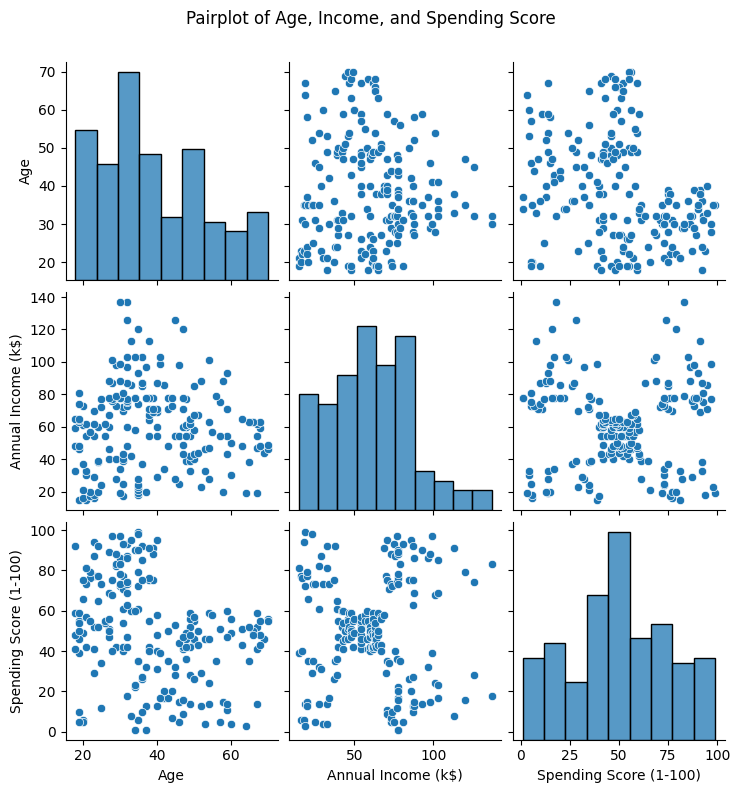

In [13]:
# Create pairwise scatterplots between selected numeric columns
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.suptitle("Pairplot of Age, Income, and Spending Score", y=1.05)
plt.show()

In [19]:
# Select the features we want to cluster on
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Initialize the scaler
scaler = StandardScaler()

# Fit scaler on data and transform it
X_scaled = scaler.fit_transform(X)


[400.0, 273.66888662642015, 157.70400815035947, 109.22822707921347, 65.56840815571681, 60.13287487193422, 49.66824483736798, 37.319122878338824, 32.49508119910091, 30.05932269404221]


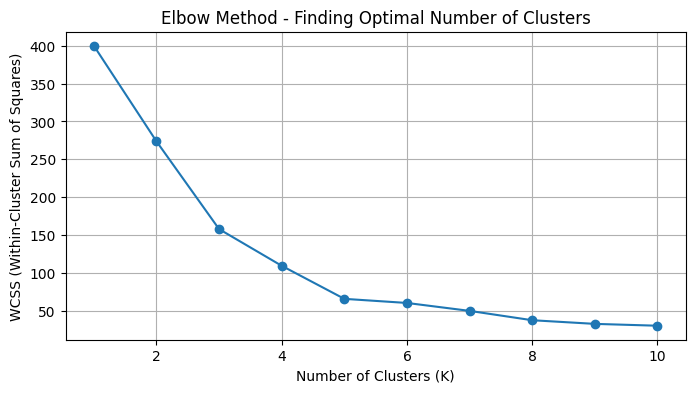

In [30]:
# Within-Cluster Sum of Squares.
wcss = []

# Test cluster counts from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)  # Use scaled features
    wcss.append(kmeans.inertia_)  # inertia_ = WCSS

print(wcss)

# Plotting the results
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method - Finding Optimal Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.grid(True)
plt.show()

### 🎯 Observing the Elbow

- Big drops occur from **K = 1 to K = 3**, and then a little more from **K = 3 to K = 5**.
- After **K = 5**, the WCSS drops become much smaller, indicating **diminishing returns**.
- So, the **“elbow point”** appears at **K = 5**, where:
  - The **WCSS drop slows down noticeably**
  - **Additional clusters don’t significantly improve** the compactness of the clusters


In [31]:
# Create the KMeans model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model to the scaled data and predict cluster labels
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe
df['Cluster'] = clusters


[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


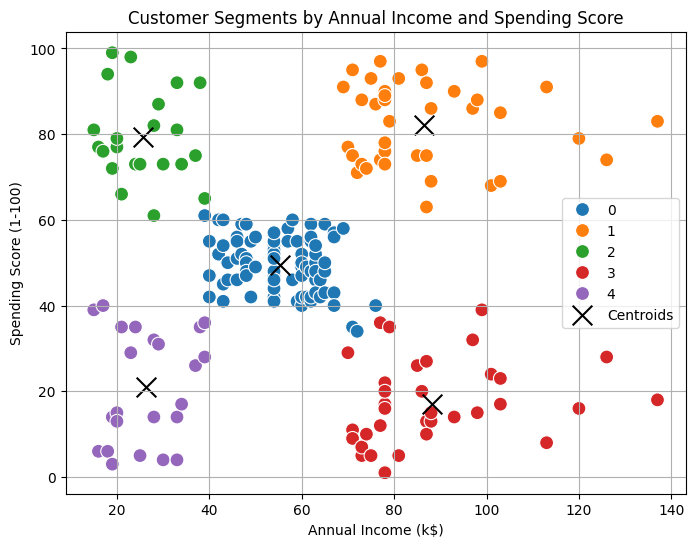

In [45]:
# Plot the clusters with different colors
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='tab10',
    s=100
)

# Plot the cluster centers (rescaled to original scale)
centroids = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids)
print(centroids_original)

plt.scatter(
    centroids_original[:, 0],  # x = Annual Income
    centroids_original[:, 1],  # y = Spending Score
    s=200,
    c='black',
    marker='x',
    label='Centroids'
)

plt.title("Customer Segments by Annual Income and Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.grid(True)
plt.show()